## Teoria sobre Arvore de Decisao

Tipo de abordagem: Probabilidade condicional

*Exemplos de uso*
 - 
 - 

*Vantagens*
 - Facil interpretacao
 - Nao precisa realizar a normalizacao ou padronizacao dos dados
 - Rapido para cliassificar novos registros

*Desvantagens*
 - Criar arvores muito complexas (overfitting)
 - Pequenas mudancas nos dados podem mudar a arvore (podar a arvore ajuda)
 - Problema NP-Completo para construit a arvore

#### ALGUNS CONCEITOS
- Upgrades como random foresta melhoram o desempenho (ficam proximos a redes neurais ou SVM)
- Treinar uma arvore de decisao é definir a ordem das ramificaçoes da arvore - Definir os atributo mais importantes.
- CART - Classification and regression trees

*Expecativa do final do algoritmo*

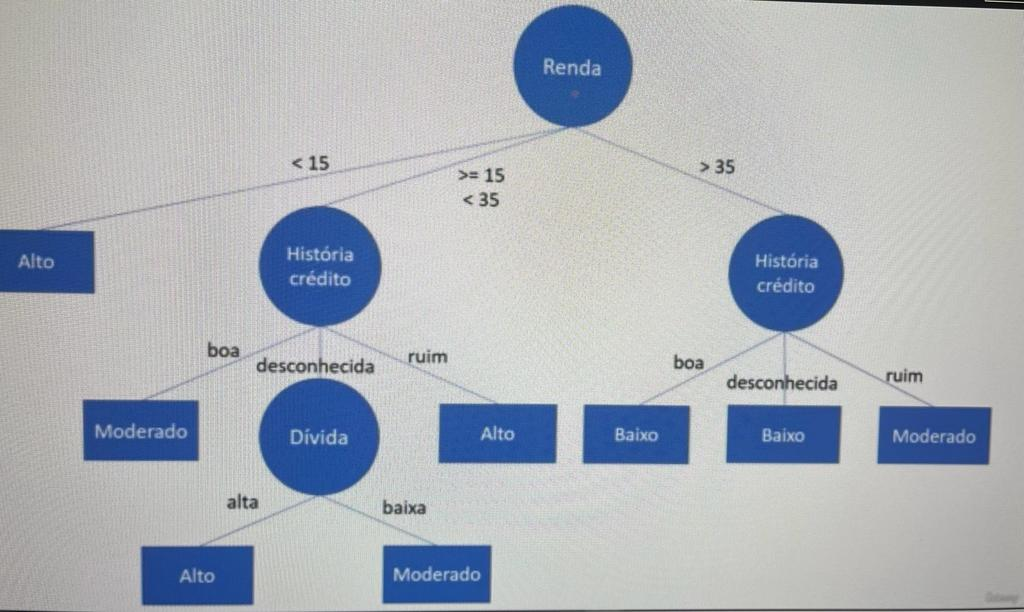

In [2]:
from IPython import display
display.Image("/Users/raulcorrea/Documents/Estudos/MLeDS_AZ/Imagens/modelo_arvore_decisao.jpeg")

# PRE PROCESSAMENTO
#### 1 - importar a base
     - importante essa base possuir na ultima coluna a variavel que referencia a classe (variavel resposta)

#### 2 - tratando a base importada
     EXEMPLOS: 
     - Removendo Nulos
          -> base = base_credit.drop(base_credit[base['age'] < 0].index) 

     - Preencher os valores manualmente - melhor maneira de tratar colunas vazias
     - Preenchendo com a media
          -> base['age'][base['age']>0].mean(); #calculando a media
          
     - Substituindo os valores negativos pelos valores medios
          -> base.loc[base['age']<0] = base['age'][base['age']>0].mean()

#### 3 - separando a base entre previsores e classe
     - Criando a base *PREVISORA* - Nessa etapa removemos a ultima coluna
          -> x_base = base.iloc[:, 1:4].values 
    
     - Criando a base de *CLASSE* - Nessa etapa criamos por exemplo uma tabela com apenas uma coluna
          -> y_base = base.iloc[:, 4].values

#### 4 - etapa de padronização da base [Standardization]
     - Padronizacao com sklearn
          -> from sklearn.preprocessing import StandardScaler
          -> scaler_credit = StandardScaler()
          -> x_base = scaler_credit.fit_transform(x_base)

#### 5 - etapa de divisão entre as bases de treinamento e teste
     - Biblioteca utilizada:
          -> from sklearn.model_selection import train_test_split
     
     - Separando a base:
          -> x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base, y_base test_size=0.25, random_state=0)
    
     - Salvando as bases:
          -> import pickle
          -> with open('/Users/Documents/base.pkl', mode ='wb') as f:
    pickle.dump([x_base_treinamento, y_base_treinamento, x_base_teste, y_base_teste],f)
        

## Algoritmo de árvore de decisão

In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Testando na base de Risco de Crédito

In [4]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [5]:
x_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [6]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

#Aplicando o modelo de arvore de decisao
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [7]:
#Observando quais sao as variaveis com maior ganho de informacao (gain)
arvore_risco_credito.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

[Text(0.6, 0.9166666666666666, 'X[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.4, 0.75, 'X[0] <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.3, 0.5833333333333334, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.4166666666666667, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3, 0.25, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8, 0.75, 'X[0] <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5833333333333334, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nva

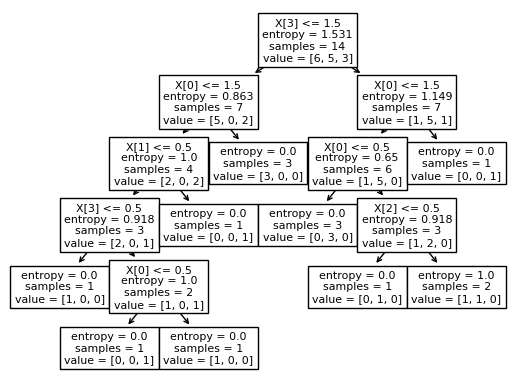

In [8]:
#Analisando a importancia das variaveis na arvore
from sklearn import tree
tree.plot_tree(arvore_risco_credito)

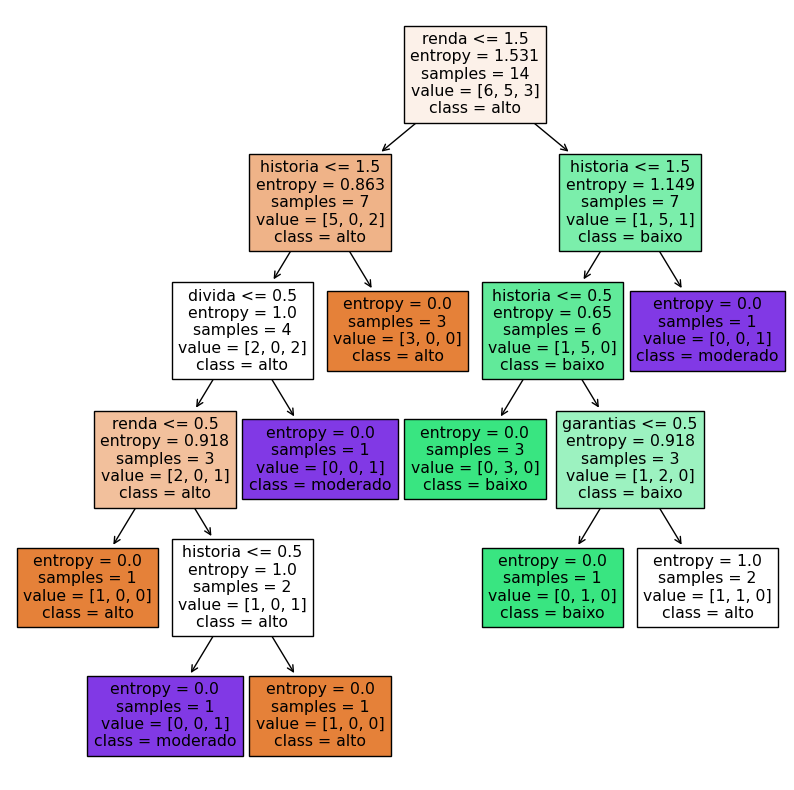

In [9]:
#Analisando a importancia das variaveis na arvore



from sklearn import tree
#renomeando as variaveis - melhorará o visual
previsores = ['historia', 'divida', 'garantias', 'renda']

#alterando a imagem do grafico 
figura, eixos = plt.subplots(nrows =1, ncols = 1, figsize = (10,10))

#a variavel class seria uma espécie de variavel 'resposta'
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [10]:
#historia = boa / divida = alta / garantias = nenhuma / renda = > 35
previsoes = arvore_risco_credito.predict([[0,0,1,2]])
previsoes

array(['baixo'], dtype=object)

## Testando na base de credito

In [19]:
with open('Bases de dados/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [18]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [33]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento.astype('int'), y_credit_treinamento.astype('int'))

DecisionTreeClassifier(criterion='entropy', random_state=0)

*Realizando as previsoes*

In [34]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes #valores previstos pelo modelo

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
y_credit_teste #valores reais

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

*Avaliando a acuracidade das previsoes*

In [36]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
accuracy_score(y_credit_teste, previsoes)

0.972

0.972

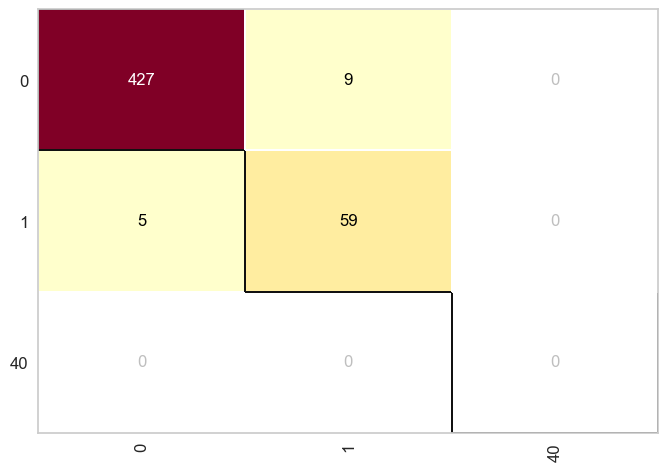

In [39]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [40]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       436
         1.0       0.87      0.92      0.89        64

    accuracy                           0.97       500
   macro avg       0.93      0.95      0.94       500
weighted avg       0.97      0.97      0.97       500

